This exercise will require you to pull some data from the Qunadl API. Qaundl is currently the most widely used aggregator of financial market data.

As a first step, you will need to register a free account on the http://www.quandl.com website.

After you register, you will be provided with a unique API key, that you should store:

In [1]:
# Store the API key as a string - according to PEP8, constants are always named in all upper case
API_KEY = 'B3aaZK2qsywQxcx2GM1T'

Qaundl has a large number of data sources, but, unfortunately, most of them require a Premium subscription. Still, there are also a good number of free datasets.

For this mini project, we will focus on equities data from the Frankfurt Stock Exhange (FSE), which is available for free. We'll try and analyze the stock prices of a company called Carl Zeiss Meditec, which manufactures tools for eye examinations, as well as medical lasers for laser eye surgery: https://www.zeiss.com/meditec/int/home.html. The company is listed under the stock ticker AFX_X.

You can find the detailed Quandl API instructions here: https://docs.quandl.com/docs/time-series

While there is a dedicated Python package for connecting to the Quandl API, we would prefer that you use the *requests* package, which can be easily downloaded using *pip* or *conda*. You can find the documentation for the package here: http://docs.python-requests.org/en/master/ 

Finally, apart from the *requests* package, you are encouraged to not use any third party Python packages, such as *pandas*, and instead focus on what's available in the Python Standard Library (the *collections* module might come in handy: https://pymotw.com/3/collections/).
Also, since you won't have access to DataFrames, you are encouraged to us Python's native data structures - preferably dictionaries, though some questions can also be answered using lists.
You can read more on these data structures here: https://docs.python.org/3/tutorial/datastructures.html

Keep in mind that the JSON responses you will be getting from the API map almost one-to-one to Python's dictionaries. Unfortunately, they can be very nested, so make sure you read up on indexing dictionaries in the documentation provided above.

In [2]:
# First, import the relevant modules
import requests
import json
import time
import sys
import matplotlib.pyplot as plt


In [3]:
# Now, call the Quandl API and pull out a small sample of the data (only one day) to get a glimpse
# into the JSON structure that will be returned
URL="https://www.quandl.com/api/v3/datasets/CFTC/0233CV_FO_L_ALL_CR.json?api_key=B3aaZK2qsywQxcx2GM1T&"
parameters = {'start_date': '2020-01-01', 'end_date':'2020-12-31'}
response = requests.get(URL, params=parameters)
if response.status_code != 200:
   raise Exception("Response was code " + str(response.status_code))
responseStr = response.text
data = json.loads(response.text)

print(data['dataset'].keys())
type(data['dataset']['data'])
print(len(data['dataset']['data']))
print(len(data['dataset']))


dict_keys(['id', 'dataset_code', 'database_code', 'name', 'description', 'refreshed_at', 'newest_available_date', 'oldest_available_date', 'column_names', 'frequency', 'type', 'premium', 'limit', 'transform', 'column_index', 'start_date', 'end_date', 'data', 'collapse', 'order', 'database_id'])
14
21


In [4]:
# Inspect the JSON structure of the object you created, and take note of how nested it is,
# as well as the overall structure


These are your tasks for this mini project:

1. Collect data from the Franfurt Stock Exchange, for the ticker AFX_X, for the whole year 2017 (keep in mind that the date format is YYYY-MM-DD).
2. Convert the returned JSON object into a Python dictionary.
3. Calculate what the highest and lowest opening prices were for the stock in this period.
4. What was the largest change in any one day (based on High and Low price)?
5. What was the largest change between any two days (based on Closing Price)?
6. What was the average daily trading volume during this year?
7. (Optional) What was the median trading volume during this year. (Note: you may need to implement your own function for calculating the median.)

In [5]:

smin = sys.float_info.max
lmin = sys.float_info.max
dmin = sys.float_info.max

smax = 0.0
lmax = 0.0
dmax = 0.0

dsum = 0.0
dlist = []

for d in data['dataset']['data']:
    smin = min(smin, d[2])
    smax = max(smax, d[2])
    lmin = min(lmin, d[1])
    lmax = max(lmax, d[1])
    
    dif = abs(d[1]-d[2])
    dmax = max(dmax, dif)
    dmin = min(dmin, dif)
    dsum += dif
    dlist.append(dif)
    
    print(d[0], d[1], d[2]) 

ave_dif = dsum / len(data['dataset']['data'])
print("Max long in 2020 was: {:.2f}".format(lmax))
print("Min long in 2020 was: {:.2f}".format(lmin))
print("Max short in 2020 was: {:.2f}".format(smax))
print("Min short in 2020 was: {:.2f}".format(smin))
print("Max differential in 2020 was: {:.2f}".format(dmax))
print("Min differential in 2020 was: {:.2f}".format(dmin))
print("Ave differential in 2020 was: {:.2f}".format(ave_dif))

print(len(dlist))


2020-12-01 81.8 75.3
2020-11-24 82.0 74.7
2020-11-03 84.2 70.6
2020-10-27 87.0 71.9
2020-08-04 84.2 72.6
2020-07-28 84.2 72.6
2020-06-30 82.0 72.5
2020-06-23 82.5 74.9
2020-03-31 79.5 74.8
2020-03-24 81.8 77.3
2020-03-03 81.2 70.9
2020-02-25 81.9 72.1
2020-02-04 76.5 74.8
2020-01-28 77.1 75.1
Max long in 2020 was: 87.00
Min long in 2020 was: 76.50
Max short in 2020 was: 77.30
Min short in 2020 was: 70.60
Max differential in 2020 was: 15.10
Min differential in 2020 was: 1.70
Ave differential in 2020 was: 8.27
14


In [6]:
def median(dlist):
    for i in dlist:
        print("{:.2f}".format(i))
        
    if len(dlist)%2 == 0: # even
        h = int(len(dlist)/2)
        return (dlist[h-1]+dlist[h])/2
    else:
        return (dlist[int(len(dlist)/2) + 1])

median_d = median(sorted(dlist))
median_d


1.70
2.00
4.50
4.70
6.50
7.30
7.60
9.50
9.80
10.30
11.60
11.60
13.60
15.10


8.549999999999997

In [7]:
print("Median differential is {:.2f}".format(median_d))

Median differential is 8.55


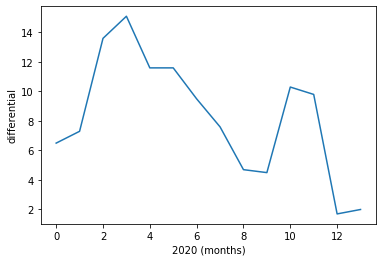

In [8]:
plt.plot(dlist)
plt.xlabel("2020 (months)")
plt.ylabel("differential")
plt.show()
